In [1]:
#The name of this project is 'Cryptara' and the objective of this script is to build a Robo-advisor
name = input("Welcome Crypto Investor, what is your name?")

Welcome Crypto Investor, what is your name? Jake


In [2]:
if name != "" or name == None:
    # If so, write a print with a string of "Hello" concatenated with the variable `name`.
    print(f"Hello {name}, my name is Cryptara. I make your savings go to good use in the Crypto market..")
    print(f"Tell me, do you have a csv file to upload or would you rather manually input your crypto tickers below?")
    print('')
    data_source=input("type: import or input")
    investment_value=input("how much would you like to invest?")
    print('')
    print(f'Once I have your list, This process starts automatically..')
    print(f'I use data from the TradingView API and filter your list, then I apply a built-in technical analysis function to determine which cryptos are good picks at this point in time')
    print(f"Then, I run hundreds of simulations to determine optimal weights for each crypto selection")
    print(f"From there, I will scan multiple exchanges to determine where you could get the most volume for the dollar at that particular time '(based on cross-exchange rates)'")
    print(f"Lastly, I will present to you an interactive Dashboard based on future projections..")

Hello Jake, my name is Cryptara. I make your savings go to good use in the Crypto market..
Tell me, do you have a csv file to upload or would you rather manually input your crypto tickers below?



type: import or input import
how much would you like to invest? 516514651351



Once I have your list, This process starts automatically..
I use data from the TradingView API and filter your list, then I apply a built-in technical analysis function to determine which cryptos are good picks at this point in time
Then, I run hundreds of simulations to determine optimal weights for each crypto selection
From there, I will scan multiple exchanges to determine where you could get the most volume for the dollar at that particular time '(based on cross-exchange rates)'
Lastly, I will present to you an interactive Dashboard based on future projections..


In [3]:
if data_source == 'input':
    ticker_1=input("Tell me the first ticker")
    ticker_2=input("Tell me the second ticker")
    ticker_3=input("Tell me the third ticker")
    ticker_4=input("Tell me the fourth ticker")
#OPEN define input option, user can either import csv file or input their tickers directly.
#Let user insert their tickers for the week:
#print(f"Tell me {name}, what are your favoriate cryptos this week?")
#crypto_one = (input("enter the ticker of your first choice:"))
#crypto_two = input("enter the ticker of your second choice:")
print(f'Thanks for using our csv file import option! Let me look through your list and see if I can validate the data..')
#OR USE LIST IMPORT
#ticker_data = Path("../crypto_thirtysix.csv")
#ticker= pd.read_csv(ticker_data, header=None)

Thanks for using our csv file import option! Let me look through your list and see if I can validate the data..


In [4]:
#Import libraries and dependencies
from dotenv import load_dotenv
from itertools import product
import datetime
import os
import logging
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [5]:
#Create TradingView variable and activate env variables
from tvDatafeed import TvDatafeed,Interval
load_dotenv()
tradev_id = os.getenv("username")
tradev_secret_key = os.getenv("password")

In [6]:
#Log into TradingView
logging.basicConfig(level=logging.DEBUG)
tv = TvDatafeed(tradev_id, tradev_secret_key, chromedriver_path=None)

DEBUG:tvDatafeed.main:auth loaded


In [7]:
from pathlib import Path
ticker_data = Path("data_files/crypto_tickers1.csv")
ticker= pd.read_csv(ticker_data, header=None)
ticker_df = pd.DataFrame(ticker)
my_crypto_list = ticker_df[0].tolist()
screener="CRYPTO"
exchange="BINANCE"
df_daily = pd.DataFrame()
print(f"Nice work! No issues have been identified, let me look into these and get back to you shortly...")

Nice work! No issues have been identified, let me look into these and get back to you shortly...


In [8]:
#Get historical pricing information for total population
for ticker in my_crypto_list:
    data = tv.get_hist(
        symbol=ticker,
        exchange=exchange,
        interval=Interval.in_daily,n_bars=500)
    df_daily = df_daily.append(data)
print(f'finished extracting historical prices..')

DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:BTCUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:ETHUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:DOGEUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:LTCUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:VGXETH...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:VGXBTC...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:MBOXBNB...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRIBEUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRIBEBTC...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRIBEBNB...
DEBUG:root:c

finished extracting historical prices..


In [9]:
#Grab indicator recommendations from Trading View API
from tradingview_ta import TA_Handler, Interval, Exchange
staging_df = pd.DataFrame()
ticker_df_daily = pd.DataFrame()
for ticker in my_crypto_list:
    try:
        data = (TA_Handler(symbol=ticker,screener=screener,
                           exchange=exchange,interval=Interval.INTERVAL_1_DAY ).get_analysis().summary)
        symbol = ticker
        staging_df = list(data.values())
        final_df = (pd.DataFrame((data), index={ticker}))
        ticker_df_daily = ticker_df_daily.append(final_df)
    except:
        pass
print(f'finished extracting analyst recommendations..')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionp

finished extracting analyst recommendations..


In [10]:
#Filter imported list by analyst recommendations
initial_drop = ticker_df_daily.loc[ticker_df_daily['RECOMMENDATION']=='SELL']
initial_pass_prime = ticker_df_daily.loc[ticker_df_daily['RECOMMENDATION']=='BUY']
initial_pass_subprime = ticker_df_daily.loc[ticker_df_daily['RECOMMENDATION']=='NEUTRAL']
#initial_drop = initial_indicator['RECOMMENDATION'].str.contains('SELL')
buy_count = initial_pass_prime['RECOMMENDATION'].count() + initial_pass_subprime['RECOMMENDATION'].count()
sell_count = initial_drop['RECOMMENDATION'].count()
print('Here are the initial findings:')
print('')
print(f'It is not a good time to invest in {sell_count} of the cryptos from your list')
print(f'These {sell_count} cryptos are not in a buying position')
print(initial_drop['RECOMMENDATION'])
print(f'These {sell_count} cryptos have been dropped from consideration..')
print('')
print('')
print(f'Moving on, our initial inidicator data suggest {buy_count} cryptos from your list should be considered for further analysis:')
print('Here they are:')
print('Our Prime candidates that are in buy positions are:')
print(initial_pass_prime['RECOMMENDATION'])
print('')
print('And these are neutral for now, we can resverve for later if we need additional cryptos for analysis')
print(initial_pass_subprime['RECOMMENDATION'])

Here are the initial findings:

It is not a good time to invest in 34 of the cryptos from your list
These 34 cryptos are not in a buying position
BTCUSD              SELL
ETHUSD              SELL
VGXBTC              SELL
MBOXBNB             SELL
MITHUSD             SELL
BURGERBNB           SELL
COVERBUSD           SELL
MATICBNB            SELL
FUNBTC              SELL
MDABTC              SELL
PAXGUSDT            SELL
MITHUSDT            SELL
MITHBTC             SELL
ADXBTC              SELL
BATETH              SELL
AKROUSDT_PREMIUM    SELL
ATMBTC              SELL
PSGBTC              SELL
USDTBVND            SELL
BUSDBVND            SELL
BUSDUAH             SELL
LPTBTC              SELL
CLVBNB              SELL
QLCETH              SELL
USDTUAH             SELL
FUNETH              SELL
WRXBNB              SELL
PAXGUSD             SELL
WINTRX              SELL
USDTDAI             SELL
ASRBTC              SELL
CLVBTC              SELL
OXTBTC              SELL
PAXGUSD             SELL
Name

In [11]:
#Extract index values for the tickers that are prime and subprime and format data for further analysis. 
initial_pass_prime.reset_index(inplace=True)
initial_pass_prime = initial_pass_prime['index']
initial_pass_subprime.reset_index(inplace=True)
initial_pass_subprime = initial_pass_subprime['index']
staging_df = pd.DataFrame()
staging_df1 = pd.DataFrame()
prime_df = pd.DataFrame()
subprime_df = pd.DataFrame()
print(f'Nice work, {name}, you found {buy_count} cryptos that might be good investments this week!')
print(f'However, give me a minute while I dig into some insider techniques')

Nice work, Jake, you found 76 cryptos that might be good investments this week!
However, give me a minute while I dig into some insider techniques


In [12]:
#Run a for loop through prime and subprime cryptos and pull in all oscilattor data for technical analysis
#Prime cryptos
for ticker in initial_pass_prime:
    try:
        data = (TA_Handler(symbol=ticker,screener=screener,
                           exchange=exchange,interval=Interval.INTERVAL_1_DAY ).get_analysis().indicators)
        symbol = ticker
        staging_df = list(data.values())
        final_df = (pd.DataFrame((data), index={ticker}))
        prime_df = prime_df.append(final_df)
    except:
        pass
    
#Sub-prime cryptos
for ticker in initial_pass_subprime:
    try:
        data = (TA_Handler(symbol=ticker,screener=screener,
                           exchange=exchange,interval=Interval.INTERVAL_1_DAY ).get_analysis().indicators)
        symbol = ticker
        staging_df1 = list(data.values())
        final_df = (pd.DataFrame((data), index={ticker}))
        subprime_df = subprime_df.append(final_df)
    except:
        pass
print('Extracted oscillator data for built-in technical analysis test')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionp

Extracted oscillator data for built-in technical analysis test


In [13]:
#Extract oscillator information for all cryptos that meet the 'buy threshold'  
crypataras_picks = []
print(f'Determining which cryptos are well positioned from a technical analysis perspective.')
print(f'This test applies a threshold to the oscillator values to determine if any cryptos are either in an overbought or oversold position')
print(f'')
def strong_performers():
    for i, j in prime_df.iterrows():
        if j['RSI'] > 45 and j['RSI'] < 90:
            print(f'{i} has passed the rsi_test, moving to moving average covergence and divergence analysis..')
            if j['MACD.macd'] > 0 and j['MACD.macd'] < 40:
                print(f'{i} has passed our moving average covergence and divergence analysis, moving to stochator analysis..')
                if j['Stoch.K'] > 35 and j['Stoch.K'] < 85:
                    if j['Stoch.D'] > 40 and j['Stoch.D'] < 85:
                        if j['Stoch.RSI.K'] > 30 and j['Stoch.RSI.K'] < 80:
                            print(f'{i} has passed our multiple stochator analysis, testing the Awesome Oscillators..')
                            if j['AO'] > 0 and j['AO'] < 55:
                                crypataras_picks.append(i)
                                
    else:
        print(f'{i} has failed one of our oscillator performance test and is dropped from consideration..')

strong_performers()
initial_count = len(crypataras_picks)
print(f'')
print('Done with technical analysis test..')

Determining which cryptos are well positioned from a technical analysis perspective.
This test applies a threshold to the oscillator values to determine if any cryptos are either in an overbought or oversold position

MITHBNB has passed the rsi_test, moving to moving average covergence and divergence analysis..
MITHBNB has passed our moving average covergence and divergence analysis, moving to stochator analysis..
BTCDOWNUSDT has passed the rsi_test, moving to moving average covergence and divergence analysis..
1INCHDOWNUSDT has passed the rsi_test, moving to moving average covergence and divergence analysis..
HARDBNB has passed the rsi_test, moving to moving average covergence and divergence analysis..
HARDBNB has passed our moving average covergence and divergence analysis, moving to stochator analysis..
EOSDOWNUSDT has passed the rsi_test, moving to moving average covergence and divergence analysis..
BNBDOWNUSDT has passed the rsi_test, moving to moving average covergence and diverg

In [14]:
crypataras_picks

['TRXXRP', 'USDTNGN', 'COTIBNB', 'LPTBNB']

In [15]:
print(f'{initial_count} of the cryptos from your list are in an optimal buying position.')
print(f'{initial_count} of the cryptos from your list are in an optimal buying position.Here they are: {crypataras_picks}')
Dup = {}
#print(This program requires a minimum of five cryptos to run further analysis. Importing random ticker from subprime dataframe 
if len(crypataras_picks) < 5:
    print('This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..')
    computer_selection_1 = subprime_df.sample().reset_index()
    ticker_random_1 = computer_selection_1.iloc[:, 0].tolist()
    string=''.join([str(item) for item in ticker_random_1])
    if string in crypataras_picks:
        string = Dup[string]
    else:
        crypataras_picks.append(string)
        Dup[string] = string = len(crypataras_picks)-1
if len(crypataras_picks) < 5:
    print('This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..')
    computer_selection_2 = subprime_df.sample().reset_index()
    ticker_random_2 = computer_selection_2.iloc[:, 0].tolist()
    string=''.join([str(item) for item in ticker_random_2])
    if string in crypataras_picks:
        string = Dup[string]
    else:
        crypataras_picks.append(string)
        Dup[string] = string = len(crypataras_picks)-1
if len(crypataras_picks) < 5:
    print('This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..')
    computer_selection_3 = subprime_df.sample().reset_index()
    ticker_random_3 = computer_selection_3.iloc[:, 0].tolist()
    string=''.join([str(item) for item in ticker_random_3])
    if string in crypataras_picks:
        string = Dup[string]
    else:
        crypataras_picks.append(string)
        Dup[string] = string = len(crypataras_picks)-1

4 of the cryptos from your list are in an optimal buying position.
4 of the cryptos from your list are in an optimal buying position.Here they are: ['TRXXRP', 'USDTNGN', 'COTIBNB', 'LPTBNB']
This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..


In [16]:
from tvDatafeed import TvDatafeed,Interval
load_dotenv()
tradev_id = os.getenv("username")
tradev_secret_key = os.getenv("password")
logging.basicConfig(level=logging.DEBUG)
tv = TvDatafeed(tradev_id, tradev_secret_key, chromedriver_path=None)

DEBUG:tvDatafeed.main:auth loaded


In [17]:
final_crypto_df = pd.DataFrame()
bars= 100
for all_picks in crypataras_picks:
    picks_df = tv.get_hist(symbol=all_picks,
                       exchange=exchange,
                       interval=Interval.in_daily,
                       n_bars=bars)
    final_crypto_df = final_crypto_df.append(picks_df)
final_crypto_df.head(5)

DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRXXRP...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:USDTNGN...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:COTIBNB...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:LPTBNB...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRIBEUSDT...


,symbol,open,high,low,close,volume
datetime,,,,,,
2021-06-12 19:00:00,BINANCE:TRXXRP,0.08168,0.08242,0.08070,0.08082,2156816.7
2021-06-13 19:00:00,BINANCE:TRXXRP,0.08080,0.08162,0.07815,0.08079,3711875.2
2021-06-14 19:00:00,BINANCE:TRXXRP,0.08091,0.08284,0.08050,0.08258,5602077.8
2021-06-15 19:00:00,BINANCE:TRXXRP,0.08261,0.08390,0.08213,0.08295,4444619.5
2021-06-16 19:00:00,BINANCE:TRXXRP,0.08290,0.08785,0.08174,0.08766,12005383.2


In [18]:
#Format dataframe.
#Step 1: extract exchange and ticker from 'symbol' column into separate columns.
final_df_cleaner = final_crypto_df
final_df_cleaner[['exchange', 'ticker']] = final_df_cleaner['symbol'].str.split(':',expand=True)
#Step 2: Extract ticker and close values, reset index
final_df_cleaner = final_df_cleaner[['ticker','close']]
final_df_cleaner = final_df_cleaner[['ticker','close']].reset_index()
#Step3: Pivot data to make ticker values the column headers
final_df_cleaner = final_df_cleaner.pivot(index='datetime',
           columns='ticker',
           values='close')
#Step4: calculate return data
print('Extracted historical returns into dataframe..')
crypto_pick_returns = final_df_cleaner.pct_change().dropna()
crypto_pick_returns.tail(5)

Extracted historical returns into dataframe..


ticker,COTIBNB,LPTBNB,TRIBEUSDT,TRXXRP,USDTNGN
datetime,,,,,
2021-09-15 19:00:00,0.159067,-0.001130,0.074643,-0.010399,-0.002846
2021-09-16 19:00:00,0.097897,0.054751,-0.055449,-0.074029,0.017481
2021-09-17 19:00:00,0.036765,-0.007722,-0.004215,-0.001925,-0.014551
2021-09-18 19:00:00,-0.100390,-0.040208,-0.006899,0.002843,0.017613
2021-09-19 19:00:00,-0.040640,0.053378,0.028260,0.004353,0.043531


In [19]:
#Step5: Calculate Cumulative Returns
print('Calculated cumulative returns..')
cumulative_daily_returns = (1 + crypto_pick_returns).cumprod() -1
cumulative_daily_returns.tail(10)

Calculated cumulative returns..


ticker,COTIBNB,LPTBNB,TRIBEUSDT,TRXXRP,USDTNGN
datetime,,,,,
2021-09-10 19:00:00,0.258410,0.025476,-0.301454,0.187542,0.096417
2021-09-11 19:00:00,0.382586,0.065238,-0.270881,0.353739,0.094176
2021-09-12 19:00:00,0.258905,0.027143,-0.277803,0.322996,0.109679
2021-09-13 19:00:00,0.235653,0.053810,-0.274689,0.448651,0.068587
2021-09-14 19:00:00,0.251319,0.053571,-0.272035,0.445832,0.050095
2021-09-15 19:00:00,0.450363,0.052381,-0.217697,0.430796,0.047107
2021-09-16 19:00:00,0.592348,0.110000,-0.261075,0.324876,0.065411
2021-09-17 19:00:00,0.650891,0.101429,-0.264190,0.322325,0.049908
2021-09-18 19:00:00,0.485158,0.057143,-0.269266,0.326084,0.068400


In [20]:
#Step5: Calculate Cumulative Returns
print('Activating Cryptara Smartfolio')
print('Logging returns to normalize dataset..')
log_returns= np.log(cumulative_daily_returns)
log_returns.tail()

Activating Cryptara Smartfolio
Logging returns to normalize dataset..


ticker,COTIBNB,LPTBNB,TRIBEUSDT,TRXXRP,USDTNGN
datetime,,,,,
2021-09-15 19:00:00,-0.797702,-2.949212,NaN,-0.842120,-3.055339
2021-09-16 19:00:00,-0.523660,-2.207275,NaN,-1.124312,-2.727057
2021-09-17 19:00:00,-0.429414,-2.288400,NaN,-1.132194,-2.997564
2021-09-18 19:00:00,-0.723280,-2.862201,NaN,-1.120600,-2.682382
2021-09-19 19:00:00,-0.856132,-2.175323,NaN,-1.103052,-2.163614


In [21]:
#Calculate volatility and 
print(f'Running multiple scenaries to determine appropriate weights for selected cryptos')
#Initialize variables for 
num_of_portfolios= 5000
weight= np.zeros((num_of_portfolios,len(crypataras_picks)))
expected_return=  np.zeros(num_of_portfolios)
expected_volatility= np.zeros(num_of_portfolios)
sharpe_ratio= np.zeros(num_of_portfolios)
expected_return
mean_log_ret= log_returns.mean()
sigma = log_returns.cov()

for i in range (num_of_portfolios):
    # generate random weight vectos 
    w= np.array(np.random.random(len(crypataras_picks)))
        #sum of weights equal to 1 
    w= w/ np.sum(w)
    weight[i,:]= w
    
    # expected log return 
    expected_return[i]= np.sum(mean_log_ret*w) 
    
    #expected volatility 
    expected_volatility[i]= np.sqrt(np.dot(w.T,np.dot(sigma,w)))
    
    # sharpe ratio
    sharpe_ratio[i] =  expected_return[i]/expected_volatility[i]

Running multiple scenaries to determine appropriate weights for selected cryptos


In [22]:
# Weighted portfolio that sharpe ratio
max_index = sharpe_ratio.argmax()
weight[max_index,:]

array([0.16470136, 0.25955501, 0.23452107, 0.0466346 , 0.29458796])

In [23]:
# Portfolio weights are exported to a csv that can be used for monteclaro simulation
portfolio_weights = np.array([weight[max_index,:]])
smartfolio_weights = pd.DataFrame(portfolio_weights)
smartfolio_weights.to_csv('smartfolio_weights.csv')

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001C16D1BD1F0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001C16D1BD1F0> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni

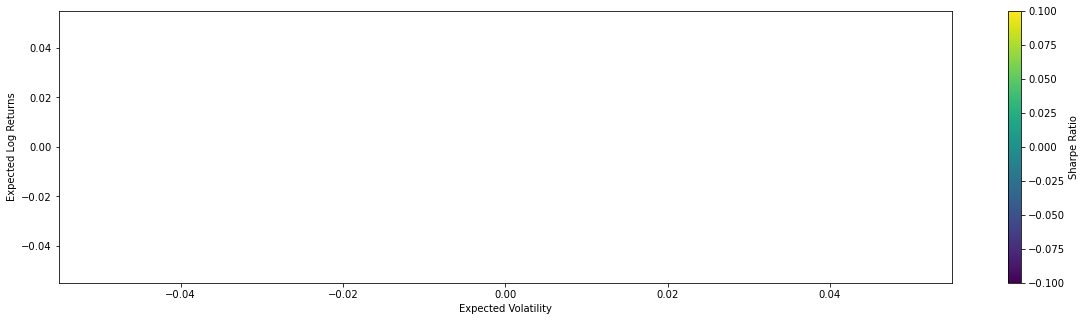

here are the smartfolio weights:          0         1         2         3         4
0  0.164701  0.259555  0.234521  0.046635  0.294588


In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(expected_volatility,expected_return,c=sharpe_ratio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Log Returns')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(expected_volatility[max_index], expected_return[max_index], c='red')
plt.show()
print(f'here are the smartfolio weights:{smartfolio_weights}')

In [25]:
#END OF DRAFT. INCLUDE AARON SIMULATION DATA

In [26]:
import itertools
from itertools import product
from MCForecastTools import MCSimulation
%matplotlib inline

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


In [27]:
#mcsims_df_modified = mcsims_df['symbol','open','high','low','close','volume']
#headers = ['symbol','open','high','low','close','volume']
#mcsims_df = mcsims_df.rename(columns=headers)
#mcsims_df.reset_index(inplace=True)
#mcsims_df.set_index('datetime')
#mcsims_df = mcsims_df['datetime','symbol','close','high','low','open','volume']
#mcsims_df
#neworder = ['symbol','close','high','low','open','volume']
#mcsims_df=mcsims_df.reindex(columns=neworder)
#mcsims_df

In [31]:
mcsims_df = pd.DataFrame()
for final_cryptos in crypataras_picks:
    mcsims = tv.get_hist(symbol=final_cryptos,
                       exchange=exchange,
                       interval=Interval.in_daily,
                       n_bars=bars)
    mcsims_df = mcsims_df.append(mcsims)

mcsims_df[['exchange', 'ticker']] = mcsims_df['symbol'].str.split(':',expand=True)
mcsims_df.reset_index(inplace=True)
#neworder = ['datetime','symbol','close','high','low','open','volume','exchange','ticker']
#mcsims_df=mcsims_df.reindex(columns=neworder)
mcsims_df.drop(columns=['symbol','exchange'],inplace=True)
mcsims_df = mcsims_df.set_index(['datetime','ticker']).unstack().swaplevel(0,1,1).sort_index(1)
mcsims_df.head()

DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRXXRP...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:USDTNGN...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:COTIBNB...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:LPTBNB...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRIBEUSDT...
C:\Users\jteel\AppData\Local\Temp/ipykernel_17696/1566379082.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  mcsims_df = mcsims_df.set_index(['datetime','ticker']).unstack().swaplevel(0,1,1).sort_index(1)


ticker                COTIBNB                                           \
                        close      high       low      open     volume   
datetime                                                                 
2021-06-13 19:00:00  0.000573  0.000598  0.000560  0.000580  1873171.0   
2021-06-14 19:00:00  0.000558  0.000594  0.000558  0.000569  1617611.0   
2021-06-15 19:00:00  0.000588  0.000591  0.000552  0.000559  1460792.0   
2021-06-16 19:00:00  0.000563  0.000592  0.000557  0.000586   975258.0   
2021-06-17 19:00:00  0.000531  0.000569  0.000526  0.000563  1504205.0   

ticker                LPTBNB                                     ...   TRXXRP  \
                       close     high      low     open  volume  ...    close   
datetime                                                         ...            
2021-06-13 19:00:00  0.07375  0.07796  0.07208  0.07376  4214.4  ...  0.08079   
2021-06-14 19:00:00  0.07254  0.07437  0.07090  0.07342  6307.3  ...  0.08258   
2021-06-15 19:00:00  0.07304  0.07641  0.07220  0.07254  7693.0  ...  0.08295   
2021-06-16 19:00:00  0.07039  0.07290  0.07000  0.07290  1822.7  ...  0.08766   
2021-06-17 19:00:00  0.07179  0.07380  0.06929  0.07001  9490.5  ...  0.08709   

ticker                                                     USDTNGN          \
                        high      low     open      volume   close    high   
datetime                                                                     
2021-06-13 19:00:00  0.08162  0.07815  0.08080   3711875.2  844.06  872.45   
2021-06-14 19:00:00  0.08284  0.08050  0.08091   5602077.8  852.02  889.92   
2021-06-15 19:00:00  0.08390  0.08213  0.08261   4444619.5  903.42  906.00   
2021-06-16 19:00:00  0.08785  0.08174  0.08290  12005383.2  911.00  911.60   
2021-06-17 19:00:00  0.08910  0.08579  0.08765  10038092.6  928.18  939.50   

ticker                                          
                        low    open     volume  
datetime                                        
2021-06-13 19:00:00  820.10  844.00  472319.15  
2021-06-14 19:00:00  834.93  840.79  232939.13  
2021-06-15 19:00:00  850.93  857.09  242878.84  
2021-06-16 19:00:00  870.00  903.42  330126.52  
2021-06-17 19:00:00  899.44  911.60  222314.49  

[5 rows x 25 columns]

mcsims_df.to_csv('updated_delete.csv')

In [29]:
MC_even_dist = MCSimulation(
    portfolio_data = mcsims_df, 
    weights = [.25, .25, .25, .25],
    num_simulation=100,
    num_trading_days = 126
)


Cumula_return = MC_even_dist.calc_cumulative_return()

In [30]:
Cumula_return = MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.


ValueError: Dot product shape mismatch, (127, 5) vs (4,)